<a href="https://colab.research.google.com/github/sumayya-md/oasis-infobyte/blob/main/unemployment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

NAME : MOHAMMED SUMAYYA BINT ANSARI

UNEMPLOYMENT ANALYSIS WITH PYTHON

Unemployment is measured by the unemployment rate which is the number of people who are unemployed as a percentage of the total labour force. We have seen a sharp increase in the unemployment rate during Covid-19, so analyzing the unemployment rate in this project.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
df = pd.read_csv("https://raw.githubusercontent.com/Apaulgithub/oibsip_task2/main/Unemployment%20in%20India.csv")
print(df.head())

           Region         Date  Frequency   Estimated Unemployment Rate (%)  \
0  Andhra Pradesh   31-05-2019    Monthly                              3.65   
1  Andhra Pradesh   30-06-2019    Monthly                              3.05   
2  Andhra Pradesh   31-07-2019    Monthly                              3.75   
3  Andhra Pradesh   31-08-2019    Monthly                              3.32   
4  Andhra Pradesh   30-09-2019    Monthly                              5.17   

    Estimated Employed   Estimated Labour Participation Rate (%)   Area  
0           11999139.0                                     43.24  Rural  
1           11755881.0                                     42.05  Rural  
2           12086707.0                                     43.50  Rural  
3           12285693.0                                     43.97  Rural  
4           12256762.0                                     44.68  Rural  


In [ ]:
print("Number of rows are: ",df.shape[0])
print("Number of columns are: ",df.shape[1])
df.info()

Number of rows are:  768
Number of columns are:  7
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


In [ ]:
df.columns
df.describe(include= 'all').round(2)

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
count,740,740,740,740.00,740.00,740.00,740
unique,28,14,2,NaN,NaN,NaN,2
top,Andhra Pradesh,31-10-2019,Monthly,NaN,NaN,NaN,Urban
freq,28,55,381,NaN,NaN,NaN,381
mean,NaN,NaN,NaN,11.79,7204460.03,42.63,NaN
std,NaN,NaN,NaN,10.72,8087988.43,8.11,NaN
min,NaN,NaN,NaN,0.00,49420.00,13.33,NaN
25%,NaN,NaN,NaN,4.66,1190404.50,38.06,NaN
50%,NaN,NaN,NaN,8.35,4744178.50,41.16,NaN
75%,NaN,NaN,NaN,15.89,11275489.50,45.50,NaN


In [ ]:
df.columns = df.columns.str.strip()
df.columns
df = df.dropna()
# Adding Day, Month, and Year
df['Date'] = pd.to_datetime(df['Date'])
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month_name()
df['Year'] = df['Date'].dt.year

# Importing Warnings library
import warnings

# Ignoring unwanted warnings
warnings.filterwarnings("ignore")

df

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area,Day,Month,Year
0,Andhra Pradesh,2019-05-31,Monthly,3.65,11999139.0,43.24,Rural,31,May,2019
1,Andhra Pradesh,2019-06-30,Monthly,3.05,11755881.0,42.05,Rural,30,June,2019
2,Andhra Pradesh,2019-07-31,Monthly,3.75,12086707.0,43.50,Rural,31,July,2019
3,Andhra Pradesh,2019-08-31,Monthly,3.32,12285693.0,43.97,Rural,31,August,2019
4,Andhra Pradesh,2019-09-30,Monthly,5.17,12256762.0,44.68,Rural,30,September,2019
...,...,...,...,...,...,...,...,...,...,...
749,West Bengal,2020-02-29,Monthly,7.55,10871168.0,44.09,Urban,29,February,2020
750,West Bengal,2020-03-31,Monthly,6.67,10806105.0,43.34,Urban,31,March,2020
751,West Bengal,2020-04-30,Monthly,15.63,9299466.0,41.20,Urban,30,April,2020
752,West Bengal,2020-05-31,Monthly,15.22,9240903.0,40.67,Urban,31,May,2020


In [ ]:
mean_unemployment = df['Estimated Unemployment Rate (%)'].mean()
print(f'Mean Unemployment Rate: {mean_unemployment:.2f}%')

# Median unemployment rate
median_unemployment = df['Estimated Unemployment Rate (%)'].median()
print(f'Median Unemployment Rate: {median_unemployment:.2f}%')

# Standard deviation of unemployment rate
std_unemployment = df['Estimated Unemployment Rate (%)'].std()
print(f'Standard Deviation of Unemployment Rate: {std_unemployment:.2f}%')

Mean Unemployment Rate: 11.79%
Median Unemployment Rate: 8.35%
Standard Deviation of Unemployment Rate: 10.72%


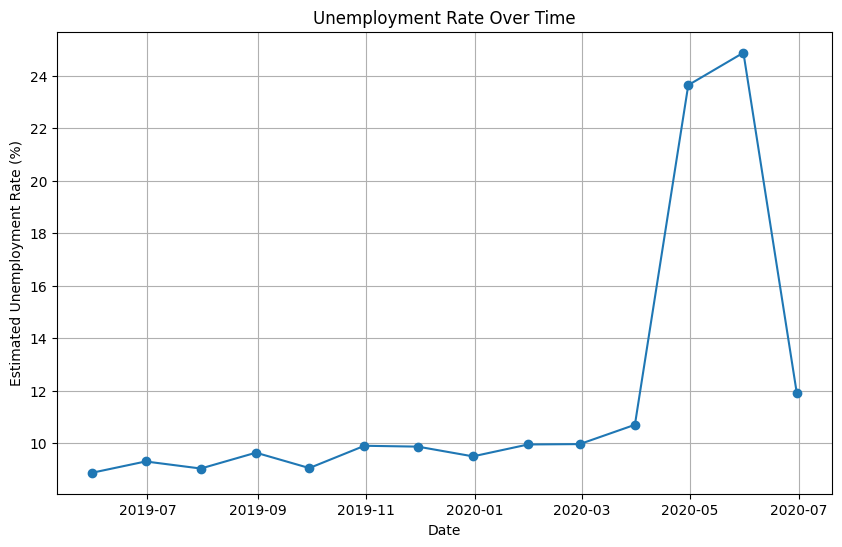

In [ ]:
# line plot
plt.figure(figsize=(10, 6))
plt.plot(mean_unemployment_over_time.index, mean_unemployment_over_time.values, marker='o', linestyle='-')
plt.xlabel('Date')
plt.ylabel('Estimated Unemployment Rate (%)')
plt.title('Unemployment Rate Over Time')
plt.grid(True)

plt.show()

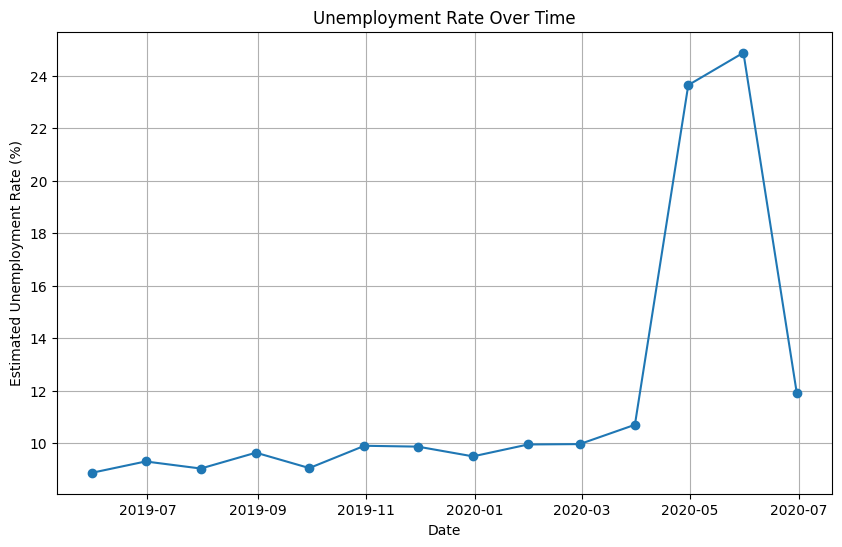

In [ ]:
mean_unemployment_over_time = df.groupby('Date')['Estimated Unemployment Rate (%)'].mean()

# line plot
plt.figure(figsize=(10, 6))
plt.plot(mean_unemployment_over_time.index, mean_unemployment_over_time.values, marker='o', linestyle='-')
plt.xlabel('Date')
plt.ylabel('Estimated Unemployment Rate (%)')
plt.title('Unemployment Rate Over Time')
plt.grid(True)

plt.show()

In [ ]:
# Bar Plot of Average Estimated Unployment Rate
fig = px.bar(df, x = 'Region', y = "Estimated Unemployment Rate (%)", color = "Region", title = "Average unemploment Rate")
fig.update_layout(xaxis = {'categoryorder':'total descending'})
fig.show()

In [ ]:
# Bar Plot of Estimated Employed people in every month
fig = px.bar(df, x = 'Month', y = 'Estimated Employed', color = 'Month', title = 'Estimated Employed People')
fig.show()

In [ ]:
# Sunburst plot
fig = px.sunburst(df, path=['Area', 'Region'], values='Estimated Unemployment Rate (%)', title='Sunburst Plot of Estimated Unemployment Rate by Region and Area')
fig.show()

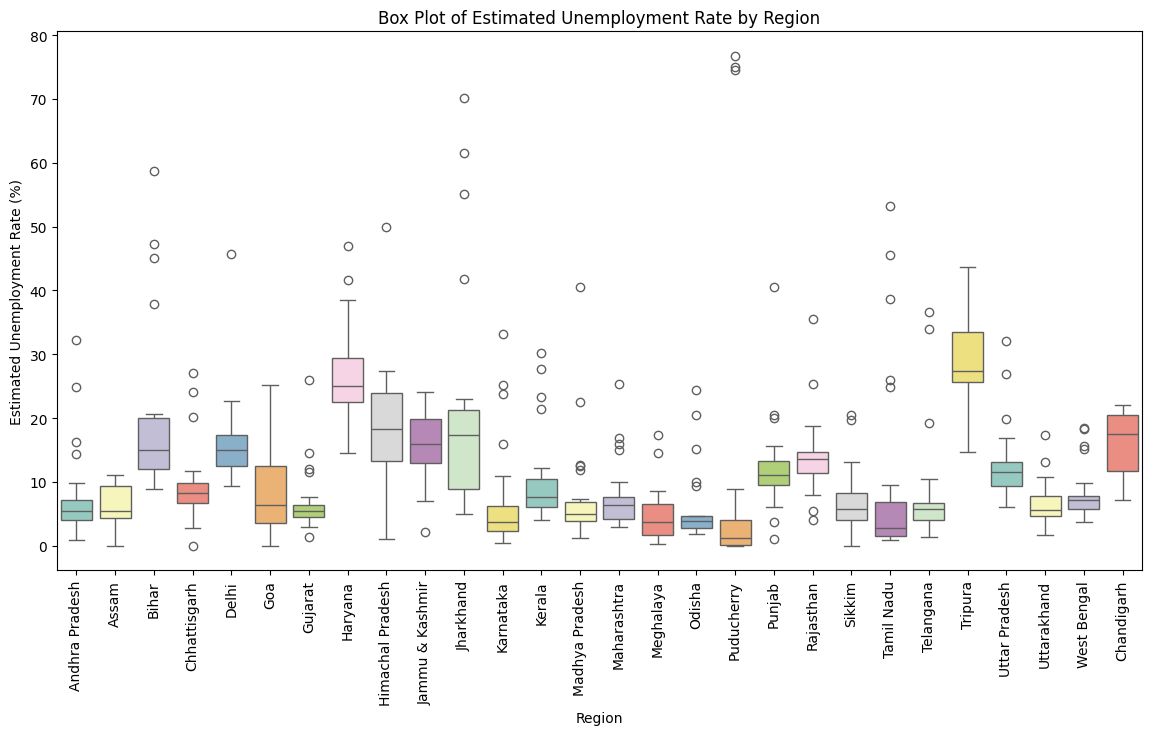

In [ ]:
plt.figure(figsize=(14, 7))
# box plot with separate colors for each region
sns.boxplot(x='Region', y='Estimated Unemployment Rate (%)', data=df, palette='Set3')
# Rotating x-axis labels for better readability
plt.xticks(rotation='vertical')
# Adding title and axis labels
plt.title('Box Plot of Estimated Unemployment Rate by Region')
plt.xlabel('Region')
plt.ylabel('Estimated Unemployment Rate (%)')
# Show the plot
plt.show()

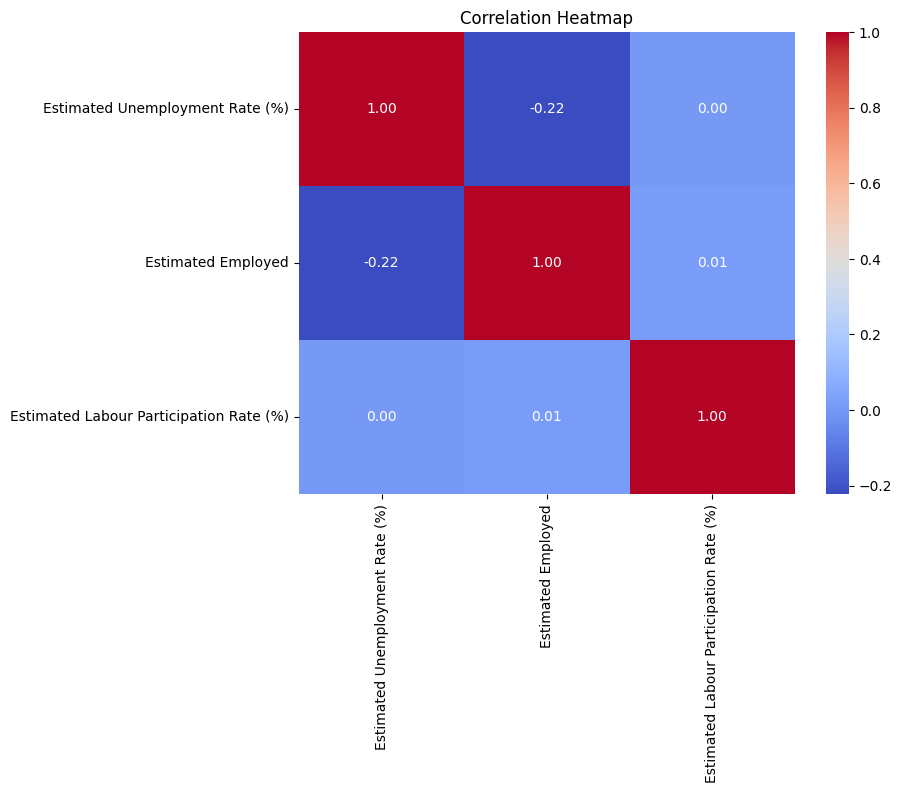

In [ ]:
# Correlation Analysis
correlation = df[['Estimated Unemployment Rate (%)', 'Estimated Employed', 'Estimated Labour Participation Rate (%)']].corr()
# heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

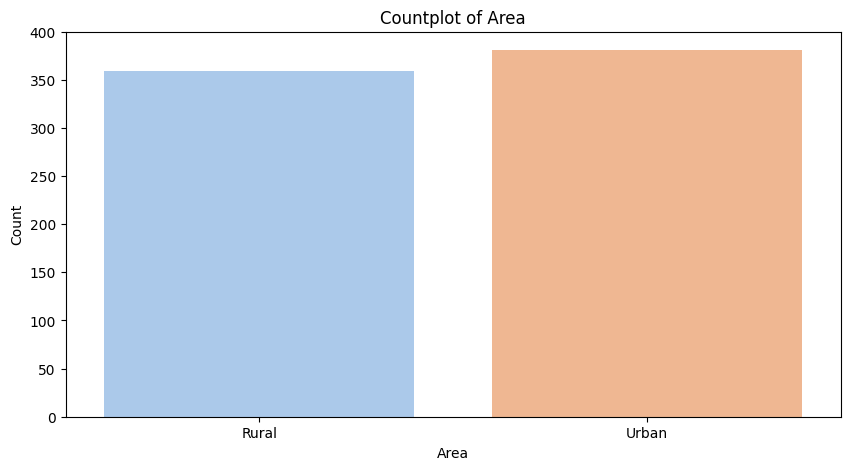

In [ ]:
# countplot for Area
fig = plt.figure(figsize=(10, 5))
sns.countplot(x='Area', data=df,palette='pastel')
plt.title('Countplot of Area')
plt.xlabel('Area')
plt.ylabel('Count')
# save the plot
plt.savefig('countplot_area.png', dpi=300)
plt.show()